In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241211_140152.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241211_140152.braidz using pyarrow


In [3]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0    50386  1.733922e+09  0.060760  0.069214  0.117521   
 1              0    50387  1.733922e+09  0.058866  0.069135  0.117149   
 2              0    50388  1.733922e+09  0.056995  0.069017  0.116834   
 3              0    50389  1.733922e+09  0.055072  0.068893  0.116606   
 4              0    50390  1.733922e+09  0.053174  0.068806  0.116402   
 ...          ...      ...           ...       ...       ...       ...   
 18297439  231235  7242897  1.733994e+09 -0.234992 -0.027040  0.003555   
 18297440  231235  7242898  1.733994e+09 -0.234997 -0.027124  0.003629   
 18297441  231235  7242899  1.733994e+09 -0.235015 -0.027190  0.003717   
 18297442  231235  7242900  1.733994e+09 -0.234896 -0.027176  0.003800   
 18297443  231235  7242901  1.733994e+09 -0.234977 -0.027237  0.003884   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.186502 -0.007864 -0.043996

In [5]:
data = extract_stimulus_centered_data(df,csvs["opto"])

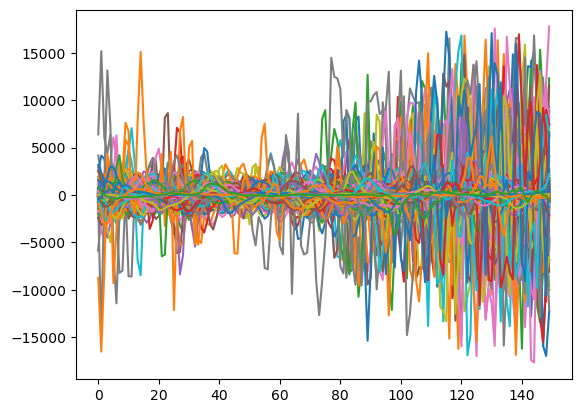

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

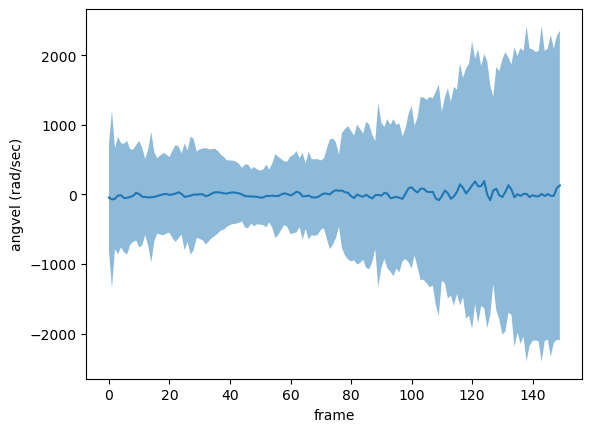

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

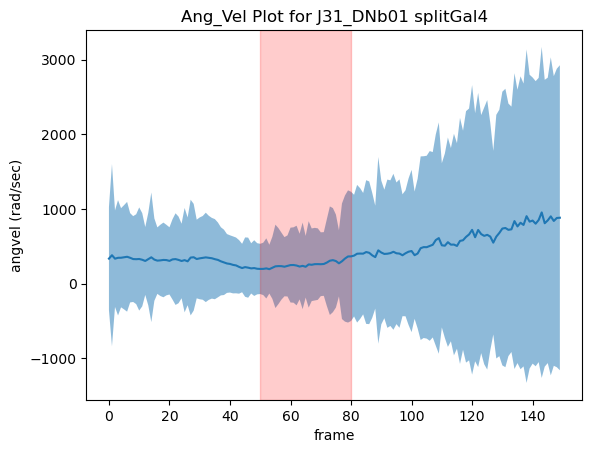

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J31_DNb01 splitGal4")
plt.show()

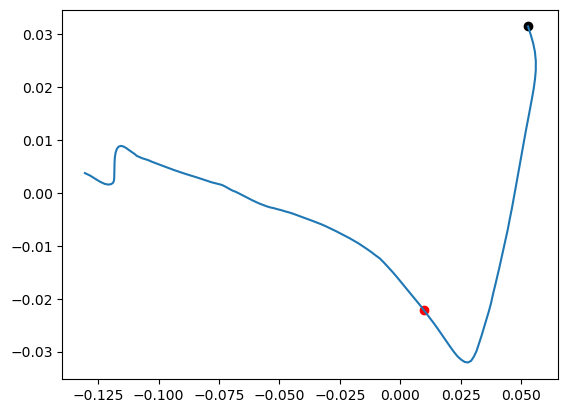

In [10]:
i = 120
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

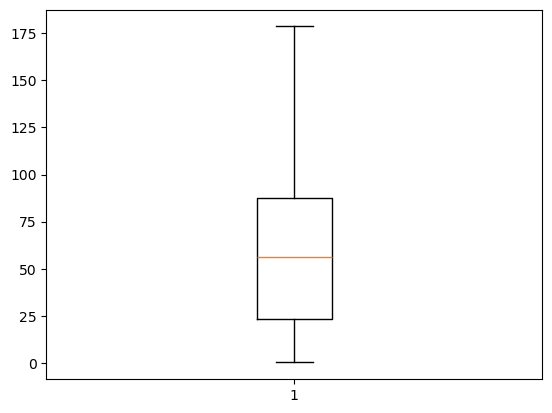

In [11]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()


In [13]:
timestamp_column = csvs["opto"]["timestamp"]
print(timestamp_column)


0      1.733923e+09
1      1.733924e+09
2      1.733924e+09
3      1.733924e+09
4      1.733924e+09
           ...     
562    1.733993e+09
563    1.733993e+09
564    1.733994e+09
565    1.733994e+09
566    1.733994e+09
Name: timestamp, Length: 567, dtype: float64


In [17]:
timestamp_column.to_csv(r"C:\\Users\\pandey\\Desktop\\FlyFlightBehavior\\timestamp_output.csv", index=False)
